In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from mpl_toolkits import mplot3d
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

Dataset source:

https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original)

Full dataset description can be found here:

https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.names

#  Attribute                     Domain
-- -----------------------------------------
1. Sample code number:           id number
2. Clump Thickness:              1 - 10
3. Uniformity of Cell Size:      1 - 10
4. Uniformity of Cell Shape:     1 - 10
5. Marginal Adhesion:            1 - 10
6. Single Epithelial Cell Size:  1 - 10
7. Bare Nuclei:                  1 - 10
8. Bland Chromatin:              1 - 10
9. Normal Nucleoli:              1 - 10
10. Mitoses:                     1 - 10
11. Class:                       (2 for benign, 4 for malignant)

In [2]:
names = ['thickness', 'UO cell size', 'UO cell shape', 'adhesion', 'SE cell size',
        'nuclei', 'chromatin', 'nucleoli', 'mitoses', 'class']
df = pd.read_csv('breast-cancer.csv', names=names, delimiter=',')
df.head()

,thickness,UO cell size,UO cell shape,adhesion,SE cell size,nuclei,chromatin,nucleoli,mitoses,class
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
print(df.shape)
df.dtypes

(699, 10)


thickness         int64
UO cell size      int64
UO cell shape     int64
adhesion          int64
SE cell size      int64
nuclei           object
chromatin         int64
nucleoli          int64
mitoses           int64
class             int64
dtype: object

In [4]:
df[df['nuclei'] == '?']

,thickness,UO cell size,UO cell shape,adhesion,SE cell size,nuclei,chromatin,nucleoli,mitoses,class
1057013,8,4,5,1,2,?,7,3,1,4
1096800,6,6,6,9,6,?,7,8,1,2
1183246,1,1,1,1,1,?,2,1,1,2
1184840,1,1,3,1,2,?,2,1,1,2
1193683,1,1,2,1,3,?,1,1,1,2
1197510,5,1,1,1,2,?,3,1,1,2
1241232,3,1,4,1,2,?,3,1,1,2
169356,3,1,1,1,2,?,3,1,1,2
432809,3,1,3,1,2,?,2,1,1,2
563649,8,8,8,1,2,?,6,10,1,4


In [5]:
filtered = df.loc[df['nuclei'] != '?'] # getting rid of troublesome rows
filtered = filtered.astype(int)
print(filtered.shape)
filtered.dtypes

(683, 10)


thickness        int64
UO cell size     int64
UO cell shape    int64
adhesion         int64
SE cell size     int64
nuclei           int64
chromatin        int64
nucleoli         int64
mitoses          int64
class            int64
dtype: object

In [6]:
# preparing data
data_df = filtered.iloc[:, :9]
class_list = filtered.iloc[:, 9].tolist()
colors = ['blue' if cl == 2 else 'red' for cl in class_list]

In [7]:
def perform_pca(data, number_of_components, scale=False):
    
    if scale:
        scaler = StandardScaler()
        data = scaler.fit_transform(data)

    pca = PCA(n_components=number_of_components)
    components = pca.fit_transform(data)
    components_dataframe = pd.DataFrame(data=components)
    
    return components_dataframe, pca

def perform_kernel_pca(data, number_of_components, scale=False, gamma=None):
    
    if scale:
        scaler = StandardScaler()
        data = scaler.fit_transform(data)

    kpca = KernelPCA(kernel="rbf", n_components=number_of_components, gamma=gamma)
    components = kpca.fit_transform(data)
    components_dataframe = pd.DataFrame(data=components)
    
    return components_dataframe, kpca

def plot_pca(components, dims, plot_kwargs={}):

    if dims == 2:
        plt.scatter(components[0], components[1], **plot_kwargs)
        plt.xlabel("PC 1")
        plt.ylabel("PC 2")  
        plt.show()
    
    elif dims == 3:
        ax = plt.axes(projection='3d')
        ax.scatter3D(components[0], components[1], components[2], **plot_kwargs);
        ax.set_xlabel('PC 1')
        ax.set_ylabel('PC 2')
        ax.set_zlabel('PC 3')
        plt.show()
        

In [8]:
pca_components, pca = perform_pca(data_df, number_of_components=None, scale=True)
print(pca_components.shape)
pca_components.head()

(683, 9)


/home/mateusz/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/mateusz/.local/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,0,1,2,3,4,5,6,7,8
0,-1.470171,-0.104273,-0.565685,-0.031959,-0.150998,0.060021,0.349403,0.420344,-0.005691
1,1.442046,-0.570141,0.236601,-0.478150,1.643085,-0.483035,-1.115899,0.379577,0.023427
2,-1.592478,-0.076120,0.048858,-0.092388,-0.059739,-0.279371,0.232740,0.209800,0.013372
3,1.479812,-0.528452,-0.603048,1.410827,-0.560737,0.063028,-0.211115,-1.607095,0.182777
4,-1.344862,-0.090719,0.029997,-0.338284,-0.108829,0.431370,0.259862,0.446655,-0.038820


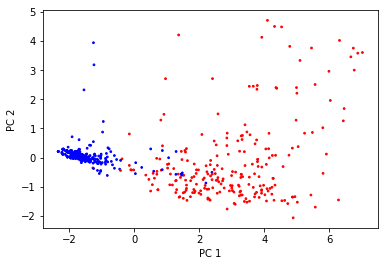

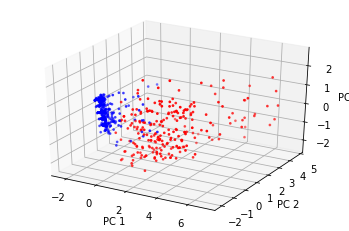

In [9]:
plot_setting = {
    's': 3,
    'c': colors
}
plot_pca(components=pca_components, dims=2, plot_kwargs=plot_setting)
plot_pca(components=pca_components, dims=3, plot_kwargs=plot_setting)

In [10]:
kpca_components, kpca = perform_kernel_pca(data_df, number_of_components=None, scale=False, gamma=0.01)
print(data_df.shape)
print(kpca_components.shape)
kpca_components.head()

(683, 9)
(683, 562)


,0,1,2,3,4,5,6,7,8,9,...,552,553,554,555,556,557,558,559,560,561
0,0.341187,-0.162844,0.175964,-0.108054,-0.038690,0.025332,0.054318,0.041787,0.121260,0.031016,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,-0.538176,-0.319483,-0.403570,-0.081618,0.021563,-0.149403,-0.073286,0.170650,-0.170463,0.083839,...,-2.608700e-13,-1.016292e-13,2.194519e-13,-1.623129e-13,6.252882e-13,5.715898e-13,1.506068e-13,9.861147e-14,3.696110e-14,2.932559e-13
2,0.377220,-0.026825,-0.030945,0.006441,-0.018047,0.003824,0.027876,0.049794,0.110990,-0.025411,...,-2.608655e-13,-1.016307e-13,2.194539e-13,-1.623158e-13,6.252953e-13,5.715927e-13,1.506082e-13,9.861331e-14,3.695791e-14,2.932567e-13
3,-0.525010,-0.142946,0.214651,0.443812,0.133919,-0.047532,0.123022,-0.009340,-0.228052,-0.157201,...,-2.608700e-13,-1.016292e-13,2.194519e-13,-1.623129e-13,6.252882e-13,5.715898e-13,1.506068e-13,9.861147e-14,3.696110e-14,2.932559e-13
4,0.336243,-0.103524,0.083616,-0.074957,-0.065981,-0.070307,0.013926,-0.017799,0.077205,0.027348,...,5.660563e-11,-9.733211e-11,3.721298e-11,6.713590e-11,9.086611e-11,1.697006e-10,-4.249199e-11,-1.216855e-12,1.994778e-11,3.018251e-11


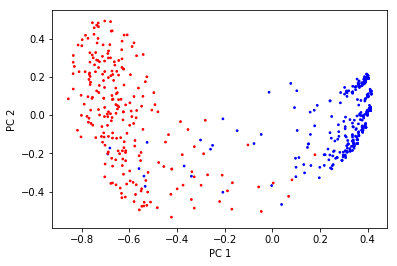

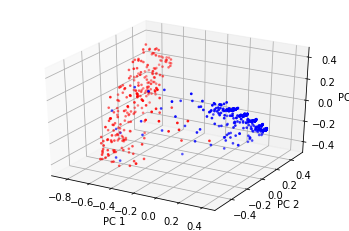

In [11]:
plot_setting = {
    's': 3,
    'c': colors
}
plot_pca(components=kpca_components, dims=2, plot_kwargs=plot_setting)
plot_pca(components=kpca_components, dims=3, plot_kwargs=plot_setting)

In [12]:
def display_scree_plot(values, number_of_components=None, percentage=False):
    
    total = sum(values)
    bar_heights = values[:number_of_components]
    
    if percentage:
        bar_heights = list(map(lambda x: x * 100 / total, bar_heights))
        plt.ylabel("[%]")

    bar_x_coordinates = np.array(range(len(bar_heights)))
    labels = ['PC ' + str(i) for i in range(1, len(bar_heights) + 1)]
    
    plt.bar(bar_x_coordinates, bar_heights, tick_label=labels)
    plt.show()
    return

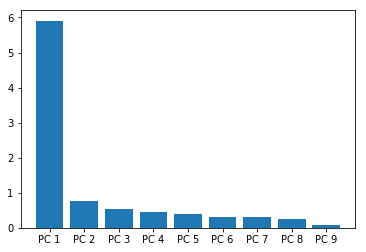

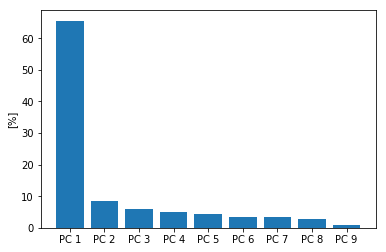

In [13]:
display_scree_plot(pca.explained_variance_)
display_scree_plot(pca.explained_variance_, percentage=True)

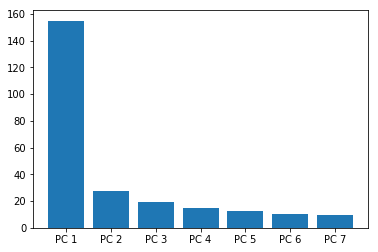

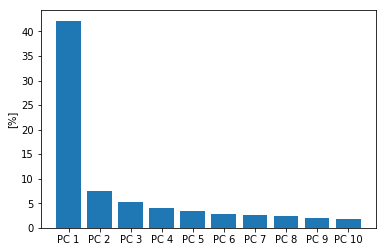

In [14]:
display_scree_plot(kpca.lambdas_, number_of_components=7)
display_scree_plot(kpca.lambdas_, number_of_components=10, percentage=True)

In [21]:
def knn_stats(samples, labels, n_neighbours):
    '''Calculates the percentage of neighbours that belong to the same class for each sample.'''
    
    nbrs = NearestNeighbors(n_neighbours, algorithm='brute').fit(samples)
    distances, indices = nbrs.kneighbors(samples)
    
    neighbour_stats = []
    
    for index, neighbours in enumerate(indices):
        same_cluster_neighbours = filter(
            lambda neighbour: labels[neighbour] == labels[index],
            neighbours
        )
        neighbour_stats.append(len(list(same_cluster_neighbours)) / n_neighbours)
        
    return neighbour_stats

In [22]:
stats = knn_stats(data_df, class_list, 5)
stats = np.array(stats)
print('original scaled data: ', np.mean(stats))

original scaled data:  0.9674963396778917


In [23]:
stats = knn_stats(pca_components, class_list, 5)
print('pca: ', np.mean(stats))

stats = knn_stats(kpca_components, class_list, 5)
print('kpca: ', np.mean(stats))

pca:  0.9657393850658859
kpca:  0.9686676427525622


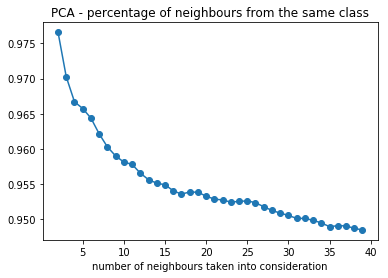

In [18]:
pca_knn_metrics = []
for k in range(2, 40):
    pca_knn_metrics.append(np.mean(knn_stats(pca_components, class_list, k)))

plt.plot(range(2, 40), pca_knn_metrics, '-o')
plt.xlabel("number of neighbours taken into consideration")
plt.title("PCA - percentage of neighbours from the same class")
plt.show()


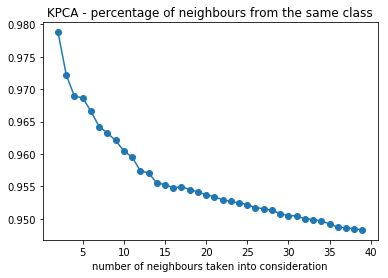

In [19]:
kpca_knn_metrics = []
for k in range(2, 40):
    kpca_knn_metrics.append(np.mean(knn_stats(kpca_components, class_list, k)))

plt.plot(range(2, 40), kpca_knn_metrics, '-o')
plt.xlabel("number of neighbours taken into consideration")
plt.title("KPCA - percentage of neighbours from the same class")
plt.show()
